In [11]:
import torch

In [12]:
x = torch.empty(5,3)
print(x)

tensor([[-3.4010e+35,  1.8581e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [13]:
rand_x = torch.rand(5,3)
print(rand_x)

tensor([[0.6939, 0.6318, 0.2140],
        [0.0091, 0.9092, 0.2082],
        [0.7667, 0.4455, 0.2381],
        [0.2514, 0.3175, 0.7102],
        [0.3281, 0.9811, 0.7553]])


In [14]:
tensor1 = torch.tensor([5.5,3])
print(tensor1)

tensor([5.5000, 3.0000])


In [15]:
tensor2 = tensor1.new_ones(5,3,dtype=torch.double)
print(tensor2)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [16]:
tensor3 = torch.randn_like(tensor2,dtype=torch.float)
print('tensor3:',tensor3)
print(tensor3.size())

tensor3: tensor([[-0.5070, -0.4864, -0.9530],
        [-0.6453,  0.4831,  2.0713],
        [-0.6358, -0.4674, -1.0187],
        [ 0.2681, -1.4647,  0.4609],
        [-1.2200,  0.8204, -1.4311]])
torch.Size([5, 3])


In [17]:
tensor4=torch.rand(5,3)
print(tensor4)
print('tensor3 + tensor4= ', tensor3 + tensor4)
print('tensor3 + tensor4= ', torch.add(tensor3, tensor4))
result = torch.empty(5, 3)
torch.add(tensor3, tensor4, out=result)
print('add result= ', result)
tensor3.add_(tensor4)
print('tensor3= ', tensor3)

tensor([[0.7777, 0.5361, 0.2856],
        [0.6626, 0.8652, 0.7340],
        [0.8263, 0.0514, 0.6831],
        [0.3817, 0.7477, 0.5269],
        [0.9625, 0.2359, 0.1599]])
tensor3 + tensor4=  tensor([[ 0.2707,  0.0497, -0.6673],
        [ 0.0172,  1.3483,  2.8054],
        [ 0.1905, -0.4159, -0.3356],
        [ 0.6498, -0.7171,  0.9878],
        [-0.2576,  1.0563, -1.2711]])
tensor3 + tensor4=  tensor([[ 0.2707,  0.0497, -0.6673],
        [ 0.0172,  1.3483,  2.8054],
        [ 0.1905, -0.4159, -0.3356],
        [ 0.6498, -0.7171,  0.9878],
        [-0.2576,  1.0563, -1.2711]])
add result=  tensor([[ 0.2707,  0.0497, -0.6673],
        [ 0.0172,  1.3483,  2.8054],
        [ 0.1905, -0.4159, -0.3356],
        [ 0.6498, -0.7171,  0.9878],
        [-0.2576,  1.0563, -1.2711]])
tensor3=  tensor([[ 0.2707,  0.0497, -0.6673],
        [ 0.0172,  1.3483,  2.8054],
        [ 0.1905, -0.4159, -0.3356],
        [ 0.6498, -0.7171,  0.9878],
        [-0.2576,  1.0563, -1.2711]])


In [18]:
print(tensor3[:,0])

tensor([ 0.2707,  0.0172,  0.1905,  0.6498, -0.2576])


In [19]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8)
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [20]:
x = torch.ones(2,2,requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [21]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [22]:
z = y * y * 3
out = z.mean()

print('z=', z)
print('out=', out)

z= tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
out= tensor(27., grad_fn=<MeanBackward0>)


In [23]:
a = torch.randn(2,2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [24]:
out.backward()
# 输出梯度 d(out)/dx
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [25]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-1677.8480,   497.5898,  -426.5834], grad_fn=<MulBackward0>)


In [26]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [27]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 输入图像是单通道，conv1 kenrnel size=5*5，输出通道 6
        self.conv1 = nn.Conv2d(1, 6, 5)
        # conv2 kernel size=5*5, 输出通道 16
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 全连接层
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # max-pooling 采用一个 (2,2) 的滑动窗口
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 核(kernel)大小是方形的话，可仅定义一个数字，如 (2,2) 用 2 即可
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        # 除了 batch 维度外的所有维度
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [35]:
params = list(net.parameters())
print('参数数量: ', len(params))
# conv1.weight
print('第一个参数大小: ', params[0].size())

参数数量:  10
第一个参数大小:  torch.Size([6, 1, 5, 5])


In [42]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.1014, -0.1156, -0.0317, -0.0687,  0.0736, -0.0209, -0.0567, -0.0524,
         -0.0845,  0.0354]], grad_fn=<AddmmBackward0>)


In [43]:
# 清空所有参数的梯度缓存，然后计算随机梯度进行反向传播
net.zero_grad()
out.backward(torch.randn(1,10))

In [46]:
output = net(input)
# 定义伪标签
target = torch.randn(10)
# 调整大小，使得和 output 一样的 size
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.0686, grad_fn=<MseLossBackward0>)


In [47]:
# MSELoss
print(loss.grad_fn)
# Linear layer
print(loss.grad_fn.next_functions[0][0])
# Relu
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [49]:
# 清空所有参数的梯度缓存
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0214, -0.0041,  0.0022, -0.0030,  0.0149, -0.0119])


In [50]:
# 简单实现权重的更新例子
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [52]:
import torch.optim as optim
# 创建优化器
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练过程中执行下列操作
optimizer.zero_grad() # 清空梯度缓存
output = net(input)
loss = criterion(output, target)
loss.backward()
# 更新权重
optimizer.step()

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


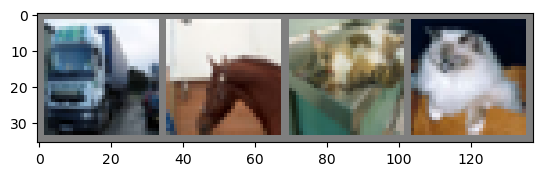

truck horse   cat   cat


In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import matplotlib.pyplot as plt
import numpy as np

# 展示图片的函数
def imshow(img):
    img = img / 2 + 0.5     # 非归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 随机获取训练集图片
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 展示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片类别标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
import time
start = time.time()
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data
        # 清空梯度缓存
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training! Total cost time: ', time.time()-start)

[1,  2000] loss: 2.187
[1,  4000] loss: 1.883
[1,  6000] loss: 1.690
[1,  8000] loss: 1.588
[1, 10000] loss: 1.517
[1, 12000] loss: 1.470
[2,  2000] loss: 1.386
[2,  4000] loss: 1.380
[2,  6000] loss: 1.365
[2,  8000] loss: 1.332
[2, 10000] loss: 1.328
[2, 12000] loss: 1.302
Finished Training! Total cost time:  88.10817098617554


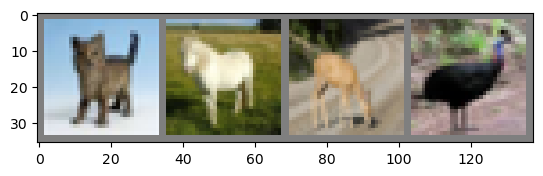

GroundTruth:    cat horse  deer  bird


In [11]:
datdaiter = iter(testloader)
images, labels = next(dataiter)

# 打印图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
# 网络输出
outputs = net(images)

# 预测结果
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   bird horse  deer  deer


In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 51 %
Accuracy of  bird : 44 %
Accuracy of   cat : 19 %
Accuracy of  deer : 48 %
Accuracy of   dog : 57 %
Accuracy of  frog : 70 %
Accuracy of horse : 58 %
Accuracy of  ship : 69 %
Accuracy of truck : 70 %


In [1]:
import torch

In [3]:
a = torch.arange(12).reshape(3,4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [5]:
a.sum(axis=0)

tensor([12, 15, 18, 21])